In [17]:
import pymc3 as pm
import pandas as pd
from yyyy_mm_dd import *
import numpy as np

In [7]:
df = pd.read_csv("forecasts.csv", parse_dates=['timestamp'])
df

,timestamp,type,forecast_delta,city,summary,precipitation,temperature,max,min
0,2021-04-26 07:40:55.852295,daily,0,Amsterdam,Partly Cloudy,1,NaN,11.0,2.0
1,2021-04-26 07:40:55.852295,daily,1,Amsterdam,Partly Cloudy,8,NaN,15.0,4.0
2,2021-04-26 07:40:55.852295,daily,2,Amsterdam,Mostly Sunny,5,NaN,16.0,6.0
3,2021-04-26 07:40:55.852295,daily,3,Amsterdam,Light Rain,82,NaN,11.0,5.0
4,2021-04-26 07:40:55.852295,daily,4,Amsterdam,Showers,47,NaN,12.0,4.0
...,...,...,...,...,...,...,...,...,...
100669,2021-05-07 07:00:31.222602,hourly,43,Cairo,Partly Cloudy,0,30.0,NaN,NaN
100670,2021-05-07 07:00:31.222602,hourly,44,Cairo,Partly Cloudy,0,29.0,NaN,NaN
100671,2021-05-07 07:00:31.222602,hourly,45,Cairo,Partly Cloudy,0,29.0,NaN,NaN
100672,2021-05-07 07:00:31.222602,hourly,46,Cairo,Partly Cloudy,0,31.0,NaN,NaN


In [8]:
hourly = df[df.type == 'hourly'].copy()
hourly = hourly.drop(columns=['min', 'max'])
hourly

,timestamp,type,forecast_delta,city,summary,precipitation,temperature
15,2021-04-26 07:40:57.075596,hourly,1,Amsterdam,Partly Cloudy,1,8.0
16,2021-04-26 07:40:57.075596,hourly,2,Amsterdam,Partly Cloudy,0,9.0
17,2021-04-26 07:40:57.075596,hourly,3,Amsterdam,Mostly Sunny,0,9.0
18,2021-04-26 07:40:57.075596,hourly,4,Amsterdam,Mostly Sunny,0,9.0
19,2021-04-26 07:40:57.075596,hourly,5,Amsterdam,Sunny,0,10.0
...,...,...,...,...,...,...,...
100669,2021-05-07 07:00:31.222602,hourly,43,Cairo,Partly Cloudy,0,30.0
100670,2021-05-07 07:00:31.222602,hourly,44,Cairo,Partly Cloudy,0,29.0
100671,2021-05-07 07:00:31.222602,hourly,45,Cairo,Partly Cloudy,0,29.0
100672,2021-05-07 07:00:31.222602,hourly,46,Cairo,Partly Cloudy,0,31.0


In [9]:
hourly['timestamp'] = [ start_of_yyyy_mm_dd_hh(timestamp) for timestamp in hourly['timestamp'] ]
hourly['forecast_for'] = [ move_yyyy_mm_dd_hh(timestamp, delta)
                           for timestamp, delta in zip(hourly['timestamp'], hourly['forecast_delta']) ]
hourly

,timestamp,type,forecast_delta,city,summary,precipitation,temperature,forecast_for
15,2021-04-26 07:00:00,hourly,1,Amsterdam,Partly Cloudy,1,8.0,2021-04-26 08:00:00
16,2021-04-26 07:00:00,hourly,2,Amsterdam,Partly Cloudy,0,9.0,2021-04-26 09:00:00
17,2021-04-26 07:00:00,hourly,3,Amsterdam,Mostly Sunny,0,9.0,2021-04-26 10:00:00
18,2021-04-26 07:00:00,hourly,4,Amsterdam,Mostly Sunny,0,9.0,2021-04-26 11:00:00
19,2021-04-26 07:00:00,hourly,5,Amsterdam,Sunny,0,10.0,2021-04-26 12:00:00
...,...,...,...,...,...,...,...,...
100669,2021-05-07 07:00:00,hourly,43,Cairo,Partly Cloudy,0,30.0,2021-05-09 02:00:00
100670,2021-05-07 07:00:00,hourly,44,Cairo,Partly Cloudy,0,29.0,2021-05-09 03:00:00
100671,2021-05-07 07:00:00,hourly,45,Cairo,Partly Cloudy,0,29.0,2021-05-09 04:00:00
100672,2021-05-07 07:00:00,hourly,46,Cairo,Partly Cloudy,0,31.0,2021-05-09 05:00:00


In [11]:
to_join = hourly[hourly.forecast_delta == 0].drop(columns=['forecast_for']).rename(columns={'timestamp': 'forecast_for'}).set_index(['city', 'forecast_for'])[['precipitation']].copy()
hourly = hourly.join(
    to_join,
    on=['city', 'forecast_for'],
    how='inner',
    rsuffix="_actual"
)
hourly

,timestamp,type,forecast_delta,city,summary,precipitation,temperature,forecast_for,precipitation_actual
16,2021-04-26 07:00:00,hourly,2,Amsterdam,Partly Cloudy,0,9.0,2021-04-26 09:00:00,0
393,2021-04-26 08:00:00,hourly,1,Amsterdam,Partly Cloudy,0,9.0,2021-04-26 09:00:00,0
771,2021-04-26 09:00:00,hourly,0,Amsterdam,Mostly Sunny,0,10.0,2021-04-26 09:00:00,0
17,2021-04-26 07:00:00,hourly,3,Amsterdam,Mostly Sunny,0,9.0,2021-04-26 10:00:00,0
394,2021-04-26 08:00:00,hourly,2,Amsterdam,Partly Cloudy,0,9.0,2021-04-26 10:00:00,0
...,...,...,...,...,...,...,...,...,...
99118,2021-05-07 03:00:00,hourly,4,Cairo,Sunny,0,31.0,2021-05-07 07:00:00,0
99495,2021-05-07 04:00:00,hourly,3,Cairo,Sunny,0,31.0,2021-05-07 07:00:00,0
99872,2021-05-07 05:00:00,hourly,2,Cairo,Sunny,0,33.0,2021-05-07 07:00:00,0
100249,2021-05-07 06:00:00,hourly,1,Cairo,Sunny,0,33.0,2021-05-07 07:00:00,0


<AxesSubplot:>

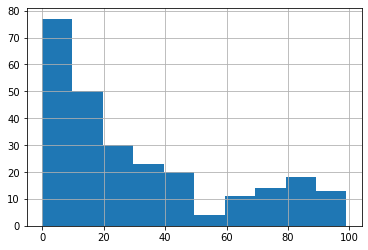

In [14]:
slice_ = hourly[(hourly.city == "Amsterdam") & (hourly.forecast_delta == 8)]
slice_['precipitation'].hist()

<AxesSubplot:>

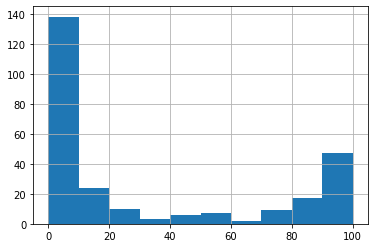

In [13]:
slice_ = hourly[(hourly.city == "Amsterdam") & (hourly.forecast_delta == 0)]
slice_['precipitation'].hist()

In [24]:
basic_model = pm.Model()

X = hourly[(hourly.city == "Amsterdam") & (hourly.forecast_delta == 8)]['precipitation']
y = hourly[(hourly.city == "Amsterdam") & (hourly.forecast_delta == 8)]['precipitation_actual']

with basic_model:
     # Means of component distributions
    mus = pm.Normal('mixture_mus', mu=0.5, sd=0.5, shape=2)
    # Group-level beta
    beta_mu = pm.NormalMixture('beta_mu', [0.5, 0.5], mu=mus, sd=0.5)
    # Betas
    beta = pm.Normal("beta", mu=beta_mu, sd=1, shape=(1,2))
#     # Error
#     eps = pm.HalfNormal('eps', 1)
#     # Estimated y values
#     y_est = beta[df['level2'].values] * X
#     # Likelihood
#     y_like = pm.Normal('likelihood', y_est, sd=eps, observed=y)

with basic_model:
    trace = pm.sample(3000, chains=1, tune=500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [beta, beta_mu, mixture_mus]


Sampling 1 chain for 500 tune and 3_000 draw iterations (500 + 3_000 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


/Users/rchaves/.pyenv/versions/3.7.8/lib/python3.7/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


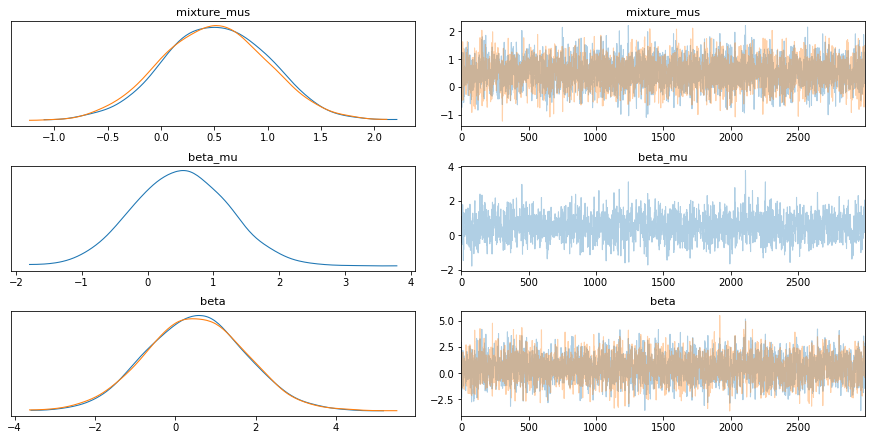

In [25]:
pm.traceplot(trace);